In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [3]:
from tensorflow.keras.datasets import cifar100

In [6]:
# Load the CIFAR-100 dataset

(train_images, train_labels), (test_images, test_images) = cifar100.load_data(label_mode="fine")

In [8]:
# Confirm that reloading the dataset does not require a download
(train_images, train_labels), (test_images, test_images) = cifar100.load_data(label_mode="fine")


#### Examine the Dataset

In [9]:
# Examine the shape of the data.

print(train_images.shape)
print(train_labels.shape)


(50000, 32, 32, 3)
(50000, 1)


[95]


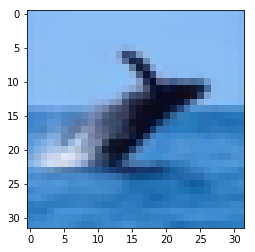

In [10]:
# Examine one of the images and its corresponding label

plt.imshow(train_images[400])
print(train_labels[400])

In [ ]:
# Load the list of labels from a JSON file

import json

with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [12]:
# Print a few of the labels

cifar100_fine_labels[0:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [15]:
# Print the corresponding label for the example above

cifar100_fine_labels[train_labels[400][0]]

'whale'

#### Load the data using different label modes

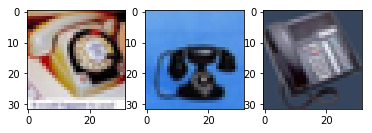

In [16]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [18]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels), (test_images, test_images) = cifar100.load_data(label_mode="coarse")


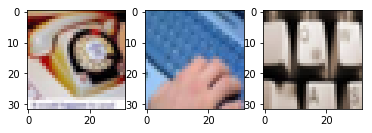

In [19]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [20]:
# Load the list of coarse labels from a JSON file

with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [21]:
# Print a few of the labels

cifar100_coarse_labels[:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [22]:
# Print the corresponding label for the example above

cifar100_coarse_labels[train_labels[400][0]]

'aquatic mammals'

#### Load the IMDB Dataset

In [24]:
from tensorflow.keras.datasets import imdb

In [25]:
# Load the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = imdb.load_data() 

17465344/17464789 [==============================] - 0s 0us/step


In [28]:
# Print an example from the training dataset, along with its corresponding label

print(train_data[400])
print(train_labels[400])

[1, 11, 1043, 541, 47, 8, 30, 10687, 17, 86, 967, 20, 231, 60, 48, 4, 875, 551, 9, 44, 17, 2671, 17, 12, 214, 11, 4, 182, 7, 97, 264, 21, 22, 1359, 451, 144, 407, 169, 14, 31, 6, 3133, 418, 7, 157, 448, 17, 12, 9, 23, 6, 283, 113, 823, 5914, 10, 10, 12, 2013, 19, 12085, 8906, 228, 467, 4, 898, 5, 19345, 905, 2692, 7, 6, 6241, 2647, 5576, 1841, 5398, 543, 2620, 956, 4, 1310, 7, 4, 22, 60, 159, 4, 898, 130, 4, 503, 1992, 1381, 7, 6138, 2370, 127, 6, 897, 292, 208, 39, 4, 380, 10, 10, 82, 788, 39, 4, 380, 670, 4215, 5, 1091, 2613, 26, 1249, 1447, 156, 36, 81, 6, 87, 292, 7, 2265, 879, 3649, 3999, 267, 18, 4, 375, 3974, 126, 67, 6, 5288, 11590, 11, 4, 5318, 1153, 609, 57, 50, 26, 107, 2572, 7, 2269, 11, 14, 182, 31, 18, 4, 1026, 5, 31, 18, 4, 338, 560, 2613, 656, 6, 32779, 7, 5212, 496, 4, 6939, 10, 10, 199, 26, 5895, 8, 1665, 4, 2524, 7, 6, 3886, 223, 800, 57, 6066, 5, 1200, 57, 4684, 496, 10, 10, 4215, 16585, 44, 102, 5, 536, 7, 3266, 18, 1818, 11, 2713, 560, 377, 7106, 11, 46530, 7, 4, 

In [29]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [30]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [31]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

(train_data, train_labels), (test_data, test_labels)= imdb.load_data(skip_top=50, oov_char=2) 

In [ ]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [32]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [33]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [34]:
# Remove the oov_char from the sequences using the filter_list function

train_data = filter_list(train_data
                        )

In [35]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [36]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [38]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)

In [40]:
# Print the shape of the DataFrame

print(fertility.shape)

(100, 10)


In [41]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [42]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [43]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [44]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [45]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [46]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.53,1.0,1.0,0.0,0.0,0.8,0.0,0.75,0.0
1,1.00,0.58,0.0,0.0,0.0,1.0,0.8,1.0,0.44,0.0
2,-1.00,0.72,1.0,1.0,1.0,1.0,0.8,-1.0,0.19,0.0
3,1.00,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.25,0.0
4,-0.33,0.81,1.0,1.0,1.0,0.0,1.0,1.0,0.38,0.0


In [47]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [48]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.53,1.0,1.0,0.0,0.0,0.8,0.0,0.75,0.0,0,1,0,0
1,0.58,0.0,0.0,0.0,1.0,0.8,1.0,0.44,0.0,0,0,0,1
2,0.72,1.0,1.0,1.0,1.0,0.8,-1.0,0.19,0.0,1,0,0,0
3,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.25,0.0,0,0,0,1
4,0.81,1.0,1.0,1.0,0.0,1.0,1.0,0.38,0.0,0,1,0,0


*N.B. The below cell has been updated since the coding tutorial.*

In [49]:
# Move the Output column such that it is the last column in the DataFrame

fertility = fertility.reindex(columns = [col for col in fertility.columns if col != 'Output'] + ['Output'])

In [50]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.53,1.0,1.0,0.0,0.0,0.8,0.0,0.75,0,1,0,0,0.0
1,0.58,0.0,0.0,0.0,1.0,0.8,1.0,0.44,0,0,0,1,0.0
2,0.72,1.0,1.0,1.0,1.0,0.8,-1.0,0.19,1,0,0,0,0.0
3,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.25,0,0,0,1,0.0
4,0.81,1.0,1.0,1.0,0.0,1.0,1.0,0.38,0,1,0,0,0.0


In [51]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [52]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [53]:
# Verify the shape of the training data

training.shape

(70, 13)

In [100]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [56]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [67]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [66]:
# Test the generator using the next() function

next(train_generator)

StopIteration: 

#### Build the model

In [68]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [69]:
# Display the model summary to show the resultant structure

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [70]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [71]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [72]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [73]:
# Set the epochs to 3

epochs = 3

In [79]:
# Train the model

for epoch in range(epochs):
    train_generator=get_generator(training_features, training_labels, batch_size =batch_size)
    validation_generator =get_generator(validation_features,validation_labels, batch_size=batch_size)
    model.fit_generator(train_generator,steps_per_epoch= train_steps, validation_data =validation_generator, validation_steps=1)

14/14 [==============================] - 1s 36ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.3432 - val_accuracy: 0.8000


In [80]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_generator, steps_per_epoch=train_steps)

ValueError: Empty training data.

#### Make an infinitely looping generator

In [75]:
# Create a function that returns an infinitely looping generator


def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
        permuted=np.random.permutation(len(features))
        features= features[permuted]
        labels=labels[permuted]

In [76]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [77]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [78]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [81]:
# Train the model

model.fit_generator(train_generator_cyclic,steps_per_epoch= train_steps, validation_data =validation_generator_cyclic, validation_steps=1)

14/14 [==============================] - 0s 33ms/step - loss: 0.4348 - accuracy: 0.8571 - val_loss: 0.1565 - val_accuracy: 1.0000


#### Evaluate the model and get predictions

In [111]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [112]:
# Get predictions on the validation data

predictions = model.evaluate_generator(validation_generator, steps=1)

print(np.round(predictions))

[1. 1.]


In [110]:
# Print the corresponding validation labels
print(validation_features.shape)
print(validation_labels)

(30, 12)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [113]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [ ]:
# Evaluate the model
predictions = model.evaluate_generator(validation_generator, steps=1)



***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [121]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [122]:
from tensorflow.keras.datasets import cifar10

In [126]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

In [127]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [128]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [129]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [130]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


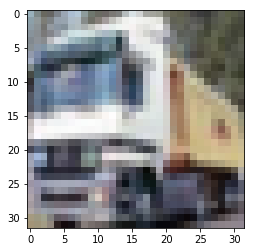

In [131]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [132]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [133]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [134]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [139]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(
preprocessing_function=monochrome, rotation_range=180, rescale=(1/255.0) )
image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [140]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(training_features, training_labels, batch_size=1, shuffle=False)

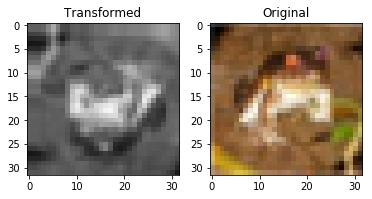

In [141]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [142]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [143]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [144]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [145]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size = 64, classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


In [146]:
# Create a validation data generator
val_generator = datagenerator.flow_from_directory(val_path, batch_size = 64, classes=classes, target_size=(16,16))


Found 1296 images belonging to 5 classes.


[0. 0. 1. 0. 0.]


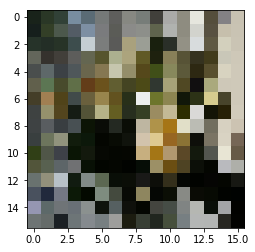

In [147]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [148]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size = 64, classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [149]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [150]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [151]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 8)         1544      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 8)           4104      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 4)           516       
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2

#### Train the model

In [153]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [154]:
# Fit the model

model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)

Epoch 1/5
47/47 [==============================] - 36s 773ms/step - loss: 1.6018 - accuracy: 0.2386
Epoch 2/5
47/47 [==============================] - 23s 498ms/step - loss: 1.5709 - accuracy: 0.3010
Epoch 3/5
47/47 [==============================] - 23s 494ms/step - loss: 1.5238 - accuracy: 0.3253
Epoch 4/5
47/47 [==============================] - 23s 498ms/step - loss: 1.4206 - accuracy: 0.3939
Epoch 5/5
47/47 [==============================] - 23s 496ms/step - loss: 1.3428 - accuracy: 0.4121


#### Evaluate the model

In [158]:
# Evaluate the model

model.evaluate_generator(val_generator, steps=val_steps)

[1.309361708164215, 0.42890626]

#### Predict using the generator

In [160]:
# Predict labels with the model

predictions = model.predict_generator(val_generator, steps=1)
print(np.round(predictions, 2))

[[0.02 0.   0.48 0.   0.5 ]
 [0.13 0.3  0.16 0.21 0.2 ]
 [0.2  0.41 0.09 0.18 0.12]
 [0.21 0.39 0.09 0.17 0.13]
 [0.19 0.44 0.07 0.19 0.11]
 [0.19 0.01 0.27 0.01 0.52]
 [0.05 0.01 0.43 0.03 0.48]
 [0.16 0.47 0.07 0.2  0.1 ]
 [0.17 0.36 0.12 0.18 0.17]
 [0.47 0.16 0.09 0.05 0.22]
 [0.14 0.19 0.26 0.15 0.26]
 [0.04 0.   0.44 0.01 0.51]
 [0.25 0.42 0.07 0.14 0.13]
 [0.43 0.22 0.09 0.06 0.2 ]
 [0.43 0.02 0.15 0.01 0.38]
 [0.12 0.35 0.15 0.23 0.15]
 [0.18 0.07 0.3  0.07 0.38]
 [0.27 0.34 0.1  0.12 0.16]
 [0.05 0.01 0.41 0.02 0.52]
 [0.01 0.   0.53 0.   0.46]
 [0.3  0.23 0.14 0.1  0.23]
 [0.15 0.37 0.12 0.23 0.14]
 [0.14 0.47 0.08 0.2  0.11]
 [0.51 0.23 0.06 0.05 0.15]
 [0.5  0.14 0.09 0.04 0.23]
 [0.17 0.01 0.29 0.02 0.5 ]
 [0.35 0.21 0.12 0.09 0.23]
 [0.13 0.34 0.15 0.23 0.15]
 [0.29 0.11 0.19 0.07 0.34]
 [0.23 0.03 0.26 0.03 0.44]
 [0.18 0.45 0.08 0.18 0.11]
 [0.09 0.02 0.37 0.04 0.49]
 [0.12 0.17 0.27 0.15 0.28]
 [0.19 0.57 0.04 0.13 0.07]
 [0.37 0.33 0.06 0.08 0.15]
 [0.12 0.08 0.33 0.0

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [162]:
x = np.zeros((100,10,2,2))

In [164]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(x)


In [165]:
# Inspect the Dataset object
print(dataset1)
print(dataset1.element_spec)


<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [172]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [173]:
# Try creating a dataset from the tensor x2
dataset2 = tf.data.Dataset.from_tensor_slices()


TypeError: from_tensor_slices() missing 1 required positional argument: 'tensors'

In [174]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [175]:
# Create another dataset from the new x2 and inspect the Dataset object
dataset2 = tf.data.Dataset.from_tensor_slices(x2)


In [176]:
# Print the element_spec

print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [177]:
# Combine the two datasets into one larger dataset

dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [178]:
# Print the element_spec

print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [179]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [180]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

3

#### Create a dataset from numpy arrays

In [181]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [183]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [184]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [188]:
# Inspect the length of an element using the take method

element = next(iter(mnist_dataset.take(1)))
print(len(element))

2


In [189]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

(28, 28)
()


#### Create a dataset from text data

In [190]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

['data/shakespeare/tempest.1.1.txt', 'data/shakespeare/tempest.1.2.txt', 'data/shakespeare/tempest.2.1.txt', 'data/shakespeare/tempest.2.2.txt', 'data/shakespeare/tempest.3.1.txt', 'data/shakespeare/tempest.3.2.txt', 'data/shakespeare/tempest.3.3.txt', 'data/shakespeare/tempest.4.1.txt', 'data/shakespeare/tempest.5.1.txt']


In [191]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [193]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [194]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [195]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [196]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [197]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [198]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset=text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)

In [199]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

#### Load the UCI Bank Marketing Dataset

In [17]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [18]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [20]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [21]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [22]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [23]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 1, 0)","(0,)",2143,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
1,44,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",29,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
2,33,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 1, 0, 0)","(0,)",2,"(1,)","(1,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
3,47,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 0, 1)","(0,)",1506,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
4,33,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",single,"(0, 0, 0, 1)","(0,)",1,"(0,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no


*N.B. The below cell has been updated to correct the name of a variable and differs from the Coding Tutorial video.*

In [24]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

*N.B. Please use ``bank_dataframe.to_dict(orient='list')`` to convert the correct dataframe to a dictionary suitable for use in the ``from_tensor_slices`` function, rather than ``dict(dataframe)`` as specified in the coding tutorial video.*

In [25]:
# Convert the DataFrame to a Dataset

bank_dataset = tf.data.Dataset.from_tensor_slices(dict(bank_dataframe))

In [26]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [27]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'married'


In [28]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [29]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [30]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
    x['y'] = 0 if (x['y'] == tf.constant([b'no'], dtype= tf.string)) else 1
    return x
bank_dataset = bank_dataset.map(map_label)

In [31]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [32]:
# Remove the 'marital' column

bank_dataset = bank_dataset.map(lambda x: {key:val for key,val in x.items() if key!= 'marital'})

In [33]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [34]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [35]:
# Map this function over the dataset

bank_dataset = bank_dataset.map(map_feature_label)


In [36]:
# Inspect the Dataset object
bank_dataset.element_spec


(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [37]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [38]:
# Make training and validation sets from the dataset
training_elements = int(dataset_length * 0.7)
train_dataset = bank_dataset.take(training_elements)
validation_dataset = bank_dataset.skip(training_elements)


#### Build a classification model

Now let's build a model to classify the features.

In [39]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [40]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# Show the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense (Dense)                (None, 400)               12400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 176,521
Trainable params: 174,861
Non-trainable params: 1,660
______________________________________________

#### Train the model

In [42]:
# Create batched training and validation datasets
train_dataset = train_dataset.batch(20, drop_remainder=True)
validation_dataset = validation_dataset.batch(100)


In [43]:
# Shuffle the training data
train_dataset = train_dataset.shuffle(1000)


In [44]:
# Fit the model

history = model.fit(train_dataset, validation_data = validation_dataset, epochs=5)

Epoch 1/5
182/182 [==============================] - 19s 104ms/step - loss: 0.6657 - accuracy: 0.6382 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
182/182 [==============================] - 16s 90ms/step - loss: 0.4812 - accuracy: 0.8283 - val_loss: 0.5248 - val_accuracy: 0.8042
Epoch 3/5
182/182 [==============================] - 16s 88ms/step - loss: 0.3774 - accuracy: 0.8909 - val_loss: 0.4596 - val_accuracy: 0.8420
Epoch 4/5
182/182 [==============================] - 16s 87ms/step - loss: 0.3075 - accuracy: 0.9110 - val_loss: 0.4667 - val_accuracy: 0.8490
Epoch 5/5
182/182 [==============================] - 16s 85ms/step - loss: 0.2594 - accuracy: 0.9242 - val_loss: 0.4217 - val_accuracy: 0.8592


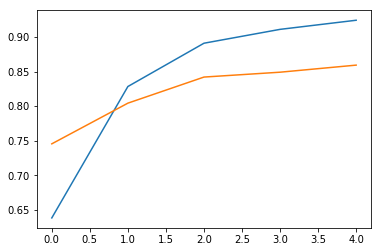

In [47]:
# Plot the training and validation accuracy

plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')